Student Name: Yuchao Wu Student Number: 1000651984

In [0]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=35a450d14ab14d3d613d2d3f58ae78bc863a2c43d1752dd236a47b9d3c020860
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
!pip install whoosh
!pip install pytrec_eval

     |████████████████████████████████| 471kB 4.8MB/s 
  Created wheel for pytrec-eval: filename=pytrec_eval-0.4-cp36-cp36m-linux_x86_64.whl size=271036 sha256=ed767ba5cee0a333302a8252a50c3fcb7ebb96cde0e26b86202f6f6f04237db8
  Stored in directory: /root/.cache/pip/wheels/58/30/73/8858a1b6e5e2674e2ea85c9904949c06addcf6fd34d59b5ea6
Successfully built pytrec-eval


In [0]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import wget
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [0]:
from whoosh import index, writing
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED
from whoosh.analysis import *
from whoosh.qparser import QueryParser
import os.path
from pathlib import Path
import tempfile
import subprocess
import pytrec_eval
import wget

In [0]:
filename = wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/20_newsgroups.zip", "20_newsgroups.zip")
!unzip 20_newsgroups.zip
DATA_DIR = "20_newsgroups"

## Functions from lab

In [0]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [0]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [0]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [0]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1 Binary Encoding

The function binary_baseline_data takes in a list of files and runs a baseline evaluation based on a binary encoding of the most commonly words as feature set. Based on the above description of choices, please describe the feature set, the amount of data, and the hyper parameters used in this baseline

In [0]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [0]:
DATA_DIR

'20_newsgroups'

In [0]:
def binary_baseline_data(file_list, num_words = 1000):
    # Calculate word count in corpus
    news_cnt = corpus_count_words(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    return X, y

In [0]:
# get the baseline data
X, y = binary_baseline_data(all_files)

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9477030792312638
Test accuracy: 0.6756666666666666


In [0]:
X

,the,to,of,a,and,I,is,in,that,AX,edu,it,for,you,on,be,com,s,have,are,not,with,t,The,this,1,as,or,was,From,Subject,ID,Message,Lines,Organization,they,but,by,can,In,...,buffalo,assume,Smith,yourself,worth,guy,wasn,box,error,involved,values,week,1993Apr5,move,taking,doubt,test,Eric,w,37,g,coming,05,action,1993Apr17,Thomas,01,uchicago,United,BATF,friend,HP,isc,present,shall,outside,cars,weapons,Summary,recently
0,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,1,1,0,0,1,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19993,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19994,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,1,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q1 (a)

[Feature set is the top 1000 most common words (most frequently shwon in the file). We have 1000 features and if a certain file contains the word (feature), its binary value would be 1, otherwise it displays 0 (meaning this file does not has this word). We have the amount of data which is around 19997 samples (number of files). The hyperparameter in this case is the C = 1, which is the inverse of regulariztion strength. Bascially, regularization applies a penalty to increasing the magnitue of parameter values to reduce overfiiting. We have a C of 1 (small number) and this will increase the srength of regularization and thus avoid overfitting.]

### Q1 (b)

Modify the following function:

Try to improve the results of the baseline by improving (only) the feature set. You can use all the techniques covered in the IR lab to improve your features (e.g., stemming, lemmatization, lowercasing, stopwords; you can use NLTK for this purpose). Your code should be written in the provided function binary_improved_data (input and return values should be similar to binary_baseline_data).

In [0]:
import nltk
from nltk.stem import *

In [0]:
# download required resources
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from whoosh.analysis import Filter
class CustomFilter(Filter):
    is_morph = True
    def __init__(self, filterFunc, *args, **kwargs):
        self.customFilter = filterFunc
        self.args = args
        self.kwargs = kwargs
    def __eq__(self):
        return (other
                and self.__class__ is other.__class__)
    def __call__(self, tokens):
        for t in tokens:
            if t.mode == 'query': # if called by query parser
                t.text = self.customFilter(t.text, *self.args, **self.kwargs)
                yield t
            else: # == 'index' if called by indexer
                t.text = self.customFilter(t.text, *self.args, **self.kwargs)
                yield t

In [0]:
def corpus_count_words_V2(file_list):
  
  word_counter = Counter()
  for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            # Use several techniques to improve the text analyzing performance
            NewAnalyzer = RegexTokenizer(r'\w+') | LowercaseFilter()| StopFilter() | StemFilter()|CustomFilter(WordNetLemmatizer().lemmatize)
            file_words = [token.text for token in NewAnalyzer(file_data)]
            word_counter.update(file_words)
  return word_counter

- Stemming: Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations.
- Lemmatization:takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma.



In [0]:
def binary_improved_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    
    # Calculate word count in corpus
    news_cnt = corpus_count_words_V2(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            # Use several techniques to improve the text analyzing performance
            NewAnalyzer = RegexTokenizer(r'\w+') | LowercaseFilter()| StopFilter() | StemFilter()| CustomFilter(WordNetLemmatizer().lemmatize)
            file_words = [token.text for token in NewAnalyzer(file_data)]
            
            df_rows.append([1 if word in file_words else 0 for word in word_list])  

    X = pd.DataFrame(df_rows, columns = word_list)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

In [0]:
X

,the,to,of,a,and,I,is,in,that,AX,edu,it,for,you,on,be,com,s,have,are,not,with,t,The,this,1,as,or,was,From,Subject,ID,Message,Lines,Organization,they,but,by,can,In,...,buffalo,assume,Smith,yourself,worth,guy,wasn,box,error,involved,values,week,1993Apr5,move,taking,doubt,test,Eric,w,37,g,coming,05,action,1993Apr17,Thomas,01,uchicago,United,BATF,friend,HP,isc,present,shall,outside,cars,weapons,Summary,recently
0,1,1,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,1,1,0,0,1,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19993,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19994,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,1,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q1 (c)

Modify the following partial code to calculate the train and test accuracy and answer the question in the markdown cell below

In [0]:
# get the baseline data
X, y = binary_improved_data(all_files)

# Write your code here:
# You need to split the data and train a logistic regression classifier.
# Then, you need to calculate the variables train_accuracy and test_accuracy for the new classifier

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9612774165892691
Test accuracy: 0.7266666666666667


[As shown above, the results have improved for both training and testing test. THis is because the analzyer is improved by adding lemmatiztion, stemmer and stop words techniques, which basically remove the unnessary words but give more consideration on the meaningful words.

### Q1 (d)

Modify the partial code below

Different train-test splits can lead to different results. In order to get a more robust estimation of the performance of your classifier, we want to calculate the mean and the 95% confidence interval on the accuracy of the classifier over a set of multiple runs with random splits. Notice that the function train_test_split takes an argument random state that can be used to create different (random) splits by passing a random value to this argument. Please implement the function random_mean_ci that creates multiple random splits of your dataset (the argument num_tests will determine the number of splits to evaluate) and re- turns a tuple (train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high) that represent the mean and the low and high ends of the 95% confidence interval for both the training accuracy and the test accuracy. We recommend you use test size=0.3 in train test split.
Note the following:
- To generate random numbers for the random_state, you can use the following code
random.randint(1,1000) that generate a random integer in the range 1 to 1000.
- The code to calculate the mean and confidence interval is provided, given a lists of accuracyresults(thevariablestrain_results, test_results)forthedifferentrandom splits.

In [0]:
def random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    for i in range(num_tests):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
      
      clf = LogisticRegression(C=1.0).fit(X_train,y_train)

      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      train_accuracy = accuracy_score(y_train,y_train_predict)
      test_accuracy = accuracy_score(y_test,y_test_predict)

      train_results.append(train_accuracy)
      test_results.append(test_accuracy)

    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

Run the above function for 10 iterations (num_tests=10, see provided code). What do the average and 95% confidence intervals tell you? Are they more informative than a single trial? Yes or no, and why?

In [0]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.961770379367007
Train confidence interval over 10 random splits: [0.960963568921447, 0.9625771898125671]
Test mean accuracy over 10 random splits: 0.7218166666666667
Test confidence interval over 10 random splits: [0.7176023412456047, 0.7260309920877286]


[ As shown in above resutls, both train and test resutls calculated by the model have a very small model variances when trying several different splits. This is much better than runing a single trial as it gives the user an idea of the model performace variances. ]

### Q1 (f)

Modify the partial code below

Implement a function random_cm that produces a confusion matrix that is based on multiple random splits. Such matrix is created by summing the confusion matrices for the different splits. Build a confusion matrix based on the results of 10 iteration (produced, as before, by calling train_test_split function with random random_state values. Note that partial code is provided that includes the summation of the different confusion matrices.

In [0]:
def random_cm(X, y, num_tests):
    # cm_list is a list of confusion matrices for the different random splits of the dataset
    cm_list = []
    
    # Write your code here
    for i in range(0,num_tests):
      X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = random.randint(1,1000))
      clf = LogisticRegression(C=1.0).fit(X_train,y_train)
      y_test_predict = clf.predict(X_test)
      cm = confusion_matrix(y_test,y_test_predict)
      cm_list.append(cm)
    # sum the confusion matrices and return the combined confusion matrix
    combined_cm = np.array(cm_list).sum(axis=0)
    # validate return type
    #assert isinstance(combined_cm, pd.DataFrame), "return type"
    assert isinstance(combined_cm, np.ndarray), "return type"
    return combined_cm

### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

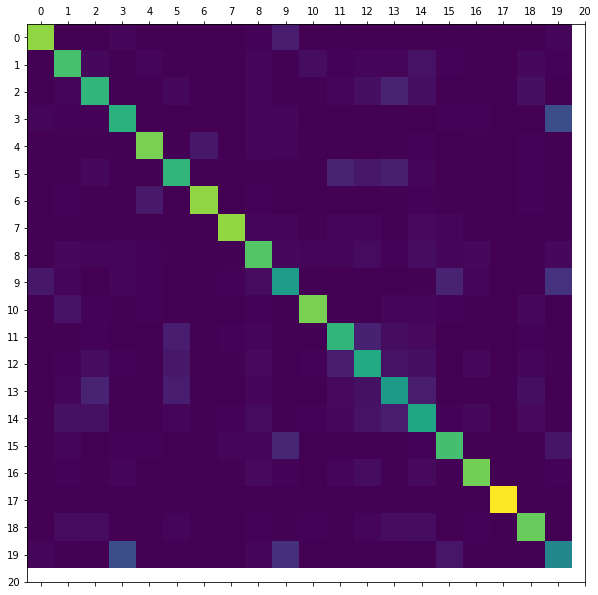

In [0]:
cm10 = random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

In [0]:
# check the actual matrix
pd.DataFrame(cm10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2559,7,5,44,11,3,5,1,27,231,2,20,9,5,7,21,22,0,2,46
1,11,2176,63,18,56,23,7,10,52,21,106,33,36,56,155,29,22,0,69,27
2,5,45,2024,2,4,65,0,6,37,3,14,59,124,290,121,5,20,0,121,7
3,44,26,25,1957,17,2,7,7,54,44,6,4,16,12,6,32,28,1,3,742
4,6,18,23,18,2457,16,201,7,44,38,15,10,8,12,31,10,19,0,32,7
5,0,12,66,3,6,2012,7,18,18,9,6,294,200,258,45,6,20,1,27,7
6,8,25,12,0,207,5,2565,1,26,9,3,11,5,18,24,15,15,0,28,14
7,3,13,10,14,11,15,2,2567,40,44,12,37,50,15,72,57,20,0,9,20
8,20,67,43,43,29,17,11,19,2250,69,39,46,92,26,105,41,67,0,19,61
9,195,49,6,36,26,7,16,34,88,1685,19,2,6,8,12,295,43,3,13,447


[As shown in the above matrix, the topic 9 is confused with topic 19. For the element, (9,19), the value is 449 meaning that the the model predicts 449 examples as topic 9 (talk.politics.misc),but they are actually topic 19 (talk.religion.misc). On the other hand, the element (19,9) indicates, 432 examples are predicted as topic 19 but they are actually topic 9. Hence, these two calsses are closely related, it becomes harder to predict. Also, since two classes are both realted to "Talk" and closely realted, which leads to the confusion]

## Q2 - Number of Features

### Q2 (a)

Modify the partial code below

Calculate the train accuracy and the test accuracy when using p percent of the features, p ∈ [10%, 20%, 40%, 60%, 80%, 100%]. The function feature_num has partial code you need to complete. It returns a dataframe of the results

In [0]:
def feature_num(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
    
        clf = LogisticRegression(C=1.0).fit(X_train_subset,y_train)

        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        
        train_accuracy = accuracy_score(y_train,y_train_predict)
        test_accuracy = accuracy_score(y_test,y_test_predict)
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes.

Use the provided code to plot the results. Explain any trends you see (average over multiple trials if trends are not clear)

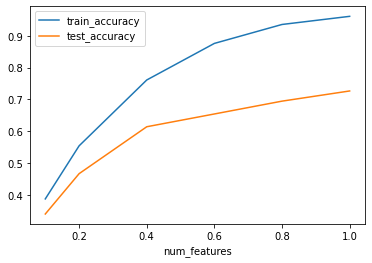

In [0]:
feature_num_df = feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

[It is shown that as the number of features increase, the perforamce score also increase.]

## Q3 Hyperparameter Tuning

### Q3 (a)

Modify the partial code below

Calculate the train accuracy and the test accuracy for different values for the hyperparameter C: [10−3, 10−2, ..., 100, ..., 103]. The function hyperparameter has partial code you need to complete. It returns a dataframe of the results.

In [0]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        clf = LogisticRegression(C=param).fit(X_train,y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        
        train_accuracy = accuracy_score(y_train,y_train_predict)
        test_accuracy = accuracy_score(y_test,y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

Use the provided code to plot the results (we use a logarithmic x axis). Explain any trends you see (average over multiple trials if trends are not clear).

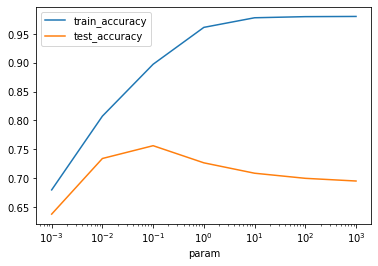

In [0]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

C is an inverse regularization paramter (1/lambda), menaing lowering c would increase the penalty.

[As shwon, the model perform the best at C = 0.1 on the test set. When C < 0.1, too much penalty on the model which could reuslt in underftting. When C> 0.1, this could lead to overfitting.]

## Q4 - Feature Encoding

### Q4 (a)

Implement a TF encoding in the function tf_improved_data. You should use your improved function binary_improved_data from Q1 (b) as a base, and change the encoding from binary to TF.

In [0]:
def tf_improved_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    
    # Calculate word count in corpus
    news_cnt = corpus_count_words_V2(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Use several techniques to improve the text analyzing performance
    tokenizer = RegexpTokenizer(r'\w+')
    NewAnalyzer = RegexTokenizer(r'\w+') | LowercaseFilter()| StopFilter() | StemFilter()| CustomFilter(WordNetLemmatizer().lemmatize)

    df_rows = []
    word_counter = Counter() # initialize an empty counter
    
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)

            file_words = [token.text for token in NewAnalyzer(file_data)]
    
            word_counter.update(file_words)# Constructed the counter via update() method
            
            df_rows.append([word_counter[word] if word in file_words else 0 for word in word_list]) 
    
    X = pd.DataFrame(df_rows, columns = word_list)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

In [0]:
X_tf, y_tf = tf_improved_data(all_files)

In [0]:
X_tf

,edu,ax,com,wa,but,thei,line,new,messag,subject,id,organ,do,re,what,my,there,on,all,write,would,u,about,he,refer,no,articl,so,post,ha,ani,who,me,like,some,sender,which,univers,other,out,...,thoma,dr,90,plu,switch,armi,minor,wasn,chanc,select,outsid,basebal,score,qualiti,knowledg,dec,magnu,tom,cup,voic,vote,ecn,freenet,logic,decis,03,isc,ride,di,rai,archiv,abort,launch,worth,bring,du,shall,iastat,technic,famili
0,3,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,4,2,0,2,2,2,2,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,4,2,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13,0,0,0,1,6,3,11,3,3,3,3,1,1,3,0,0,0,0,2,0,0,1,0,1,0,2,1,2,0,0,0,0,0,0,2,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,4,0,4,4,4,4,2,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,3,0,1,0,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22,0,0,0,0,0,5,0,5,5,5,5,0,0,0,2,2,3,3,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,4,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,66017,0,0,0,0,0,23161,0,22308,22007,21369,20385,0,0,0,0,0,16575,0,0,0,0,0,0,0,0,0,0,13529,13238,0,11975,11921,0,0,11041,0,10943,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19993,66021,0,0,0,0,0,23162,0,22309,22008,21370,20386,0,0,0,0,0,0,0,0,0,0,14613,0,0,0,0,0,13530,0,0,0,0,0,0,0,0,10944,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19994,66025,0,0,24552,23262,0,23163,0,22310,22009,21371,20387,19065,0,0,0,0,16576,16484,0,15998,15950,14614,0,0,0,13875,0,0,13240,0,0,11922,0,0,11042,0,0,0,10918,...,0,0,0,0,804,0,0,0,0,0,0,0,0,792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,66029,0,0,0,23263,0,23164,0,22311,22010,21372,20388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13531,0,12251,0,0,0,0,0,0,10945,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits.
Compare the two encodings by comparing the mean accuracy and 95% confidence inter- val. Use the function random_mean_ci from Q1 (d) and run enough trials to obtain non- overlapping 95% CIs on the average accuracy of each method. (Note this is technically statistically unsound experimentation but it will suffice for our basic analysis here.) Which method performs better on this dataset? Why do you think this occurs? 

In [0]:
X_tf, y_tf = tf_improved_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X_tf, y_tf, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))


Train mean accuracy over 10 random splits: 0.6950846609987854
Train confidence interval over 10 random splits: [0.6896968013028765, 0.7004725206946943]
Test mean accuracy over 10 random splits: 0.6314333333333334
Test confidence interval over 10 random splits: [0.6274674032616611, 0.6353992634050057]


[The TF encoding seems to perform worse than binary coding on this dataset. This is mainly due to the fact that TF encoding puts more weight to the words with realtively higher frequency, while the binary encoding gives the same amount of weight to all the words. 

Frequency based encoding tends to supress noise and it tends to be a word with a relatively small frequency in the text. Also, TF is heavily dependent on the corpus ("dataset").During training, there are more entertainment news in the corpus, and the weight of keywords related to entertainment will be lower. Therefore, it is necessary to select a high-quality corpus for training.]

## Q5 - Naive Bayes

### Q5 (a)

Implement a naive bayes classifier evaluated over multiple random splits in the function nb_random_mean_ci. You should use your random_mean_ci function from Q1 (d) as a base, and change the classifier from logistic regression to NB. Use the encoding (binary or TF) you found to be better.

In [0]:
def nb_random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    for i in range(0,num_tests):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
      
      clf = MultinomialNB().fit(X_train,y_train)# multinomial naive bayes implements the naive bayes algorithm for multinomially distributed data

      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      train_accuracy = accuracy_score(y_train,y_train_predict)
      test_accuracy = accuracy_score(y_test,y_test_predict)

      train_results.append(train_accuracy)
      test_results.append(test_accuracy)
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits.Run enough trials to obtain non-overlapping 95% CIs on the average accuracy of each clas- sifier. (Again, this is technically statistically unsound but it will suffice for our analysis.) Which method performs better on this dataset? Why do you think this occurs?

In [0]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = nb_random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.7687290133600058
Train confidence interval over 10 random splits: [0.7677615719274874, 0.7696964547925241]
Test mean accuracy over 10 random splits: 0.7148333333333333
Test confidence interval over 10 random splits: [0.7108258840223985, 0.7188407826442681]


[The mean and CI for accuracy resutls for Naive Bayes on both trianing and testing sets have shown a relatively lower score comapred with the logistic regression classifer. This could be due to the fact that Naives Bayes expect the features to be independent. However, in our case, the features are constructed by the most common words in the files which seems to be not highly independent from each other.]

## Q6 Binary Logistic Regression

### Q6 (a)

Implement the function binary_med_data that return the features and targets dataframe. In this question there are only two possible targets: 1 for sci.med and 0 for any other label. You should use the code in binary_improved_data as a base, and change the targets to be binary.

In [0]:
def binary_med_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    
    # Corpus contains the word and its count
    news_cnt = corpus_count_words_V2(file_list)
    
    # Word_list contains the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Use several techniques to improve the text analyzing performance
    tokenizer = RegexpTokenizer(r'\w+')
    NewAnalyzer = RegexTokenizer(r'\w+') | LowercaseFilter()| StopFilter() | StemFilter()| CustomFilter(WordNetLemmatizer().lemmatize)
        
    df_rows = []
    
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
                
            file_words = [token.text for token in NewAnalyzer(file_data)]
            df_rows.append([1 if word in file_words else 0 for word in word_list]) 
    
    X = pd.DataFrame(df_rows, columns = word_list)
    y = [1 if get_topic_name(file_path) == 'sci.med' else 0 for file_path in file_list]# if target name is sci,med returns 1 and retruns 0 for others
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits.

Using the function random_mean_ci in Q1 (d), calculate the average accuracy and 95% con- fidence interval over ten iterations (num_tests=10, see provided code). What do the average and 95% confidence intervals tell you? How do they compare to the multiclass logistic regres- sion in Q1 

In [0]:
X, y = binary_med_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9912195470457954
Train confidence interval over 10 random splits: [0.9907849130499777, 0.9916541810416131]
Test mean accuracy over 10 random splits: 0.9724333333333334
Test confidence interval over 10 random splits: [0.9704967900386148, 0.974369876628052]


[The mean and CI for the accuracy resuslts shows an excellent score on both training and testing sets (both above 97% of accuracy). This is to say, the binary classification has a much better performance than multiclass calssification in Q1. However, it is worth noting that we have a class imbalance issue where the classes are not represented equally. Thus, accuracy is not the proper metric when dealing the imbalanced dataset as it seems to be very misleading. I would recommend to try the follwoing performace measures that could give more insight int othe accuracy of the model than the traditional classification accuracy: confusion matrix, Precision (exactness), Recall (completeness)and F1 Score (a weighted average of precision and recall).]